importing libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [212]:
import os

In [213]:
print(os.path.abspath("Supermarket_customers.csv"))



/Users/umaobbani/Documents/customer_segmentation/Supermarket_customers.csv


In [214]:
df=pd.read_csv("/Users/umaobbani/Documents/customer_segmentation/data/Supermarket_customers.csv" , encoding='utf-8', sep='\t')


Statistics

In [215]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [216]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [217]:
# There are 41 columns in the dataframe.
# Demographics are represented by columns such as  calculate 'Age' current_years- year_of_birth'ArithmeticError
# Education and marital status are categorical variables.not required for clustering
# Income, spending score, and savings are numerical variables that can be used for clustering.
# Customer ID is a unique identifier and not useful for clustering.
# We will use 'Age', 'Income', 'Spending Score', and 'Savings' for clustering.  
# family_size = kid_count+ teen_count
# products purchased =MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
 
# Demographics - age , family iize 



In [218]:
# Drop unnecessary columns
df['age']=2025-df['Year_Birth']

# we could also use df['age'] based on the latest year in the dataset , since data is available in 202

max_year = df['Year_Birth'].max()
print(f"Max year of birth: {max_year}")

min_year = df['Year_Birth'].min()
print(f"Min year of birth: {min_year}")

print(df[['Year_Birth', 'age']].head())

count_greate_80 = df[df['age'] > 80].shape[0]
print(f"Number of customers older than 80: {count_greate_80}")

count_greate_18 = df[df['age'] < 18].shape[0]
print(f"Number of customers older than 80: {count_greate_18}")

df['age'].describe()


Max year of birth: 1996
Min year of birth: 1893
   Year_Birth  age
0        1957   68
1        1954   71
2        1965   60
3        1984   41
4        1981   44
Number of customers older than 80: 19
Number of customers older than 80: 0


count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: age, dtype: float64

In [219]:
# delete the users age less than 18 and greater than 80
df = df[(df['age'] >= 18) & (df['age'] <= 80)]

In [220]:
df.shape

(2221, 30)

In [221]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    579
Single      476
Divorced    228
Widow        74
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [222]:
# remove the unnecesary rows - Alone  , and Absurd , YOLO
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO', 'Alone'])]

In [223]:
df['Marital_Status'].value_counts()
maritel_status_mapping = {
    'Single': 1,
    'Married': 2,
    'Divorced': 1,
    'Widow': 1,
    'Together': 2
}
df['Marital_Status_num'] = df['Marital_Status'].map(maritel_status_mapping)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Marital_Status_num
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,71,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,60,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,41,2
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,44,2


In [224]:
df['family_size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status_num']
print(df['family_size'])

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: family_size, Length: 2214, dtype: int64


In [225]:
# check on the income column and null values on each column and the null percentage 
# unique rows and null values 
duplicate_rows = df[df.duplicated(keep=False)] 
print("Number of unique rows:", duplicate_rows)

# There are No duplicate rows


Number of unique rows: Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, age, Marital_Status_num, family_size]
Index: []

[0 rows x 32 columns]


In [226]:
# check for the NULl value percentage in each column
total_rows = df.shape[0]
print(f"Total number of rows: {total_rows}")
Null_counts = df.isnull().sum()
print(f"Null counts in each column:{Null_counts}")
Null_percentage = (Null_counts / total_rows) * 100


Total number of rows: 2214
Null counts in each column:ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
Marital_Status_num      0
family_size             0
dtype: int64


In [227]:
# There are 23 rows with null income values
print(f"Null percentage in each column:{Null_percentage}")

Null percentage in each column:ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.038844
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
age                    0.000000
Marital_S

In [228]:
 # befor going to drop lets check about age and income distribution
 missing_income = df[df['Income'].isnull()]
 print(f"Number of missing income values: {missing_income}")


Number of missing income values:          ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         

In [229]:
# checking for income outliers 
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]
df.shape

(2183, 32)

In [230]:
# not taking income who has null values into the analysis
df = df[df['Income'].notnull()]
df.shape



(2183, 32)

In [231]:
# Numerical columns to be used for clustering
total_spent = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Spending_Score'] = total_spent / df['Income'] * 100
print(total_spent)
print(df[['Spending_Score', 'Income']])


0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Length: 2183, dtype: int64
      Spending_Score   Income
0           2.781313  58138.0
1           0.058260  46344.0
2           1.083602  71613.0
3           0.198904  26646.0
4           0.723929  58293.0
...              ...      ...
2235        2.190353  61223.0
2236        0.693598  64014.0
2237        2.177919  56981.0
2238        1.217416  69245.0
2239        0.325332  52869.0

[2183 rows x 2 columns]


In [232]:
# we could consider 'Recency- Recency measures how recently a customer made a purchase insted of dt_customer
df['Education'].value_counts()
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5

}
df['Education_num'] = df['Education'].map(education_mapping)
df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Marital_Status_num,family_size,Spending_Score,Education_num
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,68,1,1,2.781313,3
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,71,1,3,0.058260,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,60,2,2,1.083602,3
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,41,2,3,0.198904,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,44,2,3,0.723929,5


In [233]:
# education
df['Education'].value_counts()

Education
Graduation    1108
PhD            465
Master         358
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [234]:
df.columns 

df['total_spent'] = total_spent
number_purchased=df['NumDealsPurchases']  + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['number_purchased'] = number_purchased   
       
numerical_features = ['age', 'Income', 'Spending_Score', 'family_size','Receny' , 'Education_num','total_spent','number_purchased']
print(f"Numerical features for clustering: {numerical_features}")


Numerical features for clustering: ['age', 'Income', 'Spending_Score', 'family_size', 'Receny', 'Education_num', 'total_spent', 'number_purchased']


In [235]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,age,Marital_Status_num,family_size,Spending_Score,Education_num,total_spent,number_purchased
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,11,1,68,1,1,2.781313,3,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,3,11,0,71,1,3,0.058260,3,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,3,11,0,60,2,2,1.083602,3,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,11,0,41,2,3,0.198904,3,53,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,11,0,44,2,3,0.723929,5,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,11,0,58,2,3,2.190353,3,1341,18
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,3,11,0,79,2,5,0.693598,5,444,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,11,0,44,1,1,2.177919,3,1241,19
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,11,0,69,2,3,1.217416,4,843,23


['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age', 'Marital_Status_num', 'family_size', 'Spending_Score', 'Education_num', 'total_spent', 'number_purchased']


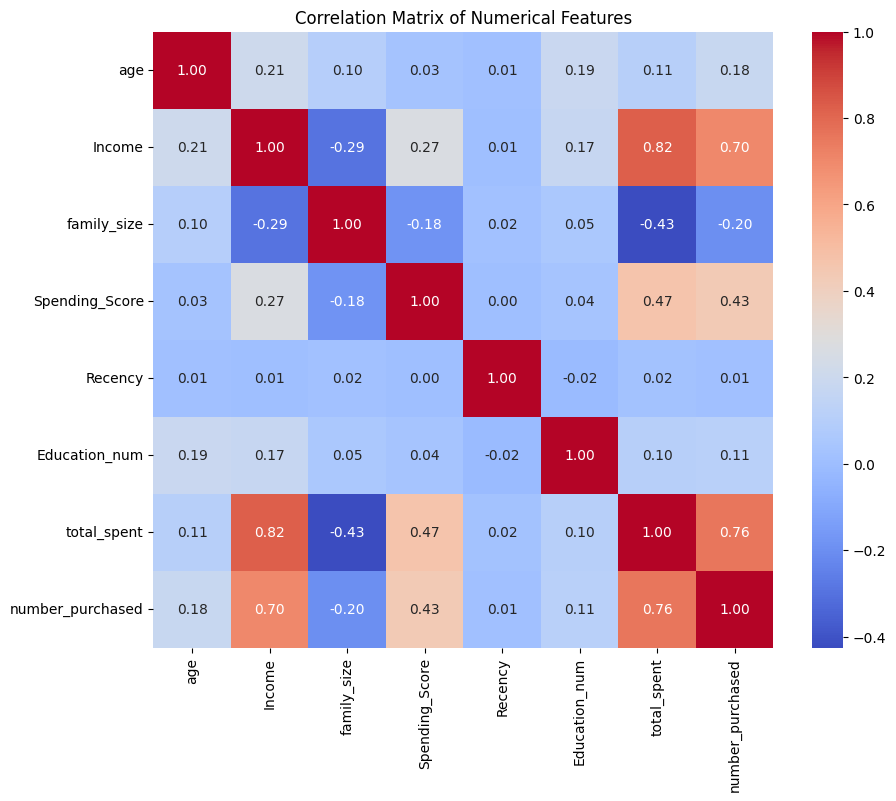

In [236]:
numerical_features = ['age', 'Income', 'family_size', 'Spending_Score', 'Recency', 'Education_num', 'total_spent', 'number_purchased']
print(df.columns.tolist())
correlation_matrix = df[numerical_features].corr()
correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [237]:
# standardize the numerical features before clustering
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)
scaled_df.head()   

,age,Income,family_size,Spending_Score,Recency,Education_num,total_spent,number_purchased
0,1.045625,0.319245,-1.775315,1.059383,0.309426,-0.449094,1.685600,1.332803
1,1.305592,-0.249769,0.439264,-0.550765,-0.381988,-0.449094,-0.959273,-1.161025
2,0.352379,0.969359,-0.668026,0.055522,-0.796836,-0.449094,0.286645,0.807787
3,-1.294080,-1.200118,0.439264,-0.467602,-0.796836,-0.449094,-0.916023,-0.898516
4,-1.034113,0.326723,0.439264,-0.157153,1.553969,1.547590,-0.302213,0.545279


Elbow method to find the optimal number of clusters 

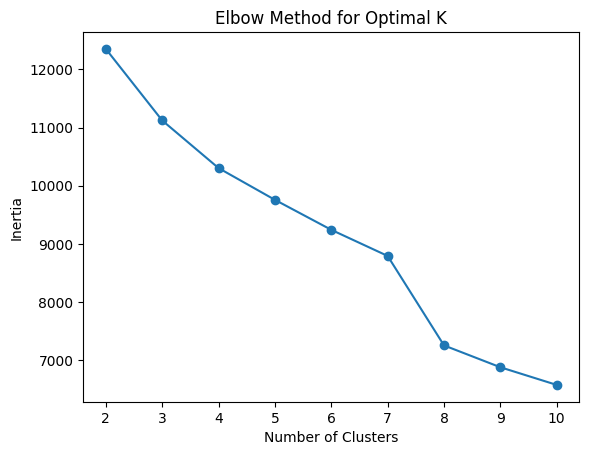

In [238]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [239]:
# choosing clustering as 5 based on elbow method
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)
predicted_clusters = kmeans.predict(scaled_df)

# Assign to DataFrame
df['Cluster'] = predicted_clusters
df['Cluster'] = kmeans.labels_
df['Cluster'].value_counts()    

Cluster
0    560
2    524
4    409
3    407
1    283
Name: count, dtype: int64

In [240]:
# Analysis
cluster_profile = df.groupby('Cluster')[numerical_features].mean()
print("\nCluster Profile:")
print(cluster_profile)


Cluster Profile:
               age        Income  family_size  Spending_Score    Recency  \
Cluster                                                                    
0        47.700000  29897.401786     2.500000        0.337584  51.716071   
1        63.770318  64267.522968     2.501767        1.495140  50.240283   
2        60.181298  40604.811069     3.368321        0.312952  46.797710   
3        53.083538  76804.054054     1.641278        2.115746  54.167076   
4        59.178484  61134.178484     2.792176        1.279356  42.366748   

         Education_num  total_spent  number_purchased  
Cluster                                                
0             2.739286    96.919643          7.700000  
1             4.745583   955.021201         21.667845  
2             4.007634   130.278626          9.221374  
3             3.321867  1493.248157         20.781327  
4             2.938875   775.716381         21.207824  


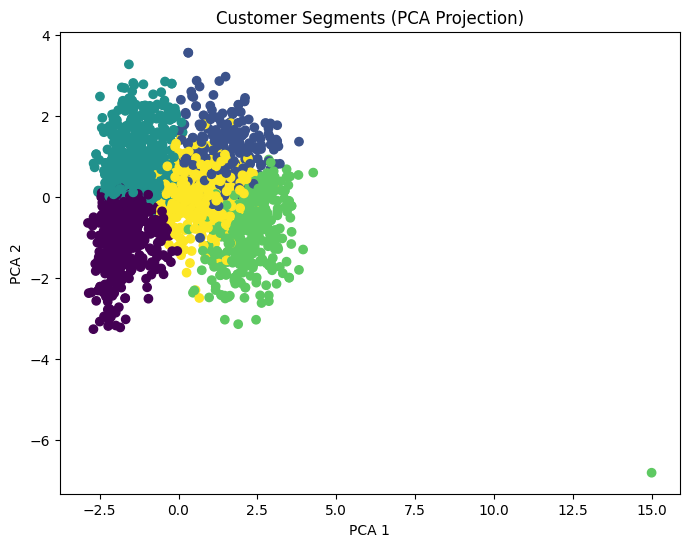

In [241]:
from  sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['Cluster'], cmap='viridis')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segments (PCA Projection)")
plt.show()

# Analysing based on clusters




In [309]:
cluster_0_df = df[df['Cluster'] == 0]
cluster_0_df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted,RFM_Segment
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,10,2014,2,10,1,8,53,0,Champions
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,11,13,2012,11,13,0,6,61,0,Loyal Customers
14,2569,1987,Graduation,Married,17323.0,0,0,2012-10-10,38,3,...,10,10,2012,10,10,0,5,46,0,Champions
16,9736,1980,Graduation,Married,41850.0,1,1,2012-12-24,51,53,...,12,24,2012,12,24,2,9,96,0,Loyal Customers
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,...,11,3,2012,11,3,1,8,133,0,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,9246,1985,Master,Together,40101.0,1,0,2012-10-14,73,171,...,10,14,2012,10,14,1,17,415,0,At Risk
2222,10659,1979,2n Cycle,Together,7500.0,1,0,2013-05-07,7,2,...,5,7,2013,5,7,1,11,53,0,Champions
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,3,16,2013,3,16,1,9,84,1,Potential Loyalists
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,8,17,2012,8,17,0,4,22,0,Champions


In [ ]:
# Recommendations :
    
# cluster = 0 - Engage discounts, loyalty programs, promotions to increase purchase frequency.


In [313]:
# Define a simple function based on Income & Spending_Score
def assign_segment(row):
    if row['Income'] < 40000 and row['Spending_Score'] < 100:
        return 'Low Income, Low Spender'
    elif row['Income'] > 70000 and row['Spending_Score'] > 500:
        return 'High Income, High Spender'
    elif row['Income'] > 70000:
        return 'High Income, Medium Spender'
    elif row['Spending_Score'] > 500:
        return 'Medium-High Income, Medium-High Spender'
    else:
        return 'Low-Mid Income, Low Spender'

# Map to each customer
df['Customer_Segment'] = df.apply(assign_segment, axis=1)
df[['Cluster', 'Customer_Segment', 'Income', 'Spending_Score']].head()


,Cluster,Customer_Segment,Income,Spending_Score
0,3,"Low-Mid Income, Low Spender",58138.0,2.781313
1,2,"Low-Mid Income, Low Spender",46344.0,0.058260
2,4,"High Income, Medium Spender",71613.0,1.083602
3,0,"Low Income, Low Spender",26646.0,0.198904
4,1,"Low-Mid Income, Low Spender",58293.0,0.723929


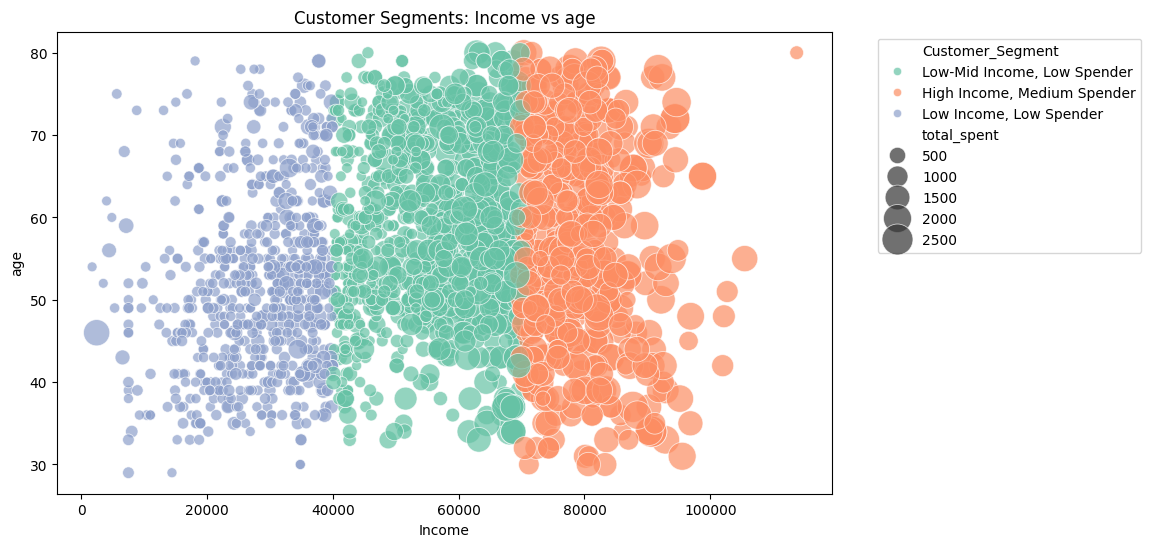

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Scatter plot of Income vs Spending_Score, colored by Cluster
sns.scatterplot(
    data=df,
    x='Income',
    y='age',
    hue='Customer_Segment',  # color by segment
    size='total_spent',      # bubble size = total spent
    sizes=(50, 500),         # size scale
    palette='Set2',
    alpha=0.7
)

plt.title('Customer Segments: Income vs age')
plt.xlabel('Income')
plt.ylabel('age')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  # move legend outside
plt.show()


In [242]:
df[numerical_features].describe()

,age,Income,family_size,Spending_Score,Recency,Education_num,total_spent,number_purchased
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.00000,2183.000000,2183.000000
mean,55.933578,51520.982135,2.603298,0.989704,49.049473,3.44984,603.679340,14.845625
std,11.542560,20731.863967,0.903313,1.691570,28.932890,1.00189,601.300928,7.620555
min,29.000000,1730.000000,1.000000,0.023136,0.000000,1.00000,5.000000,0.000000
25%,48.000000,34964.500000,2.000000,0.234478,24.000000,3.00000,68.500000,8.000000
50%,55.000000,51195.000000,3.000000,0.792752,49.000000,3.00000,393.000000,15.000000
75%,65.000000,68211.000000,3.000000,1.545597,74.000000,4.00000,1042.500000,21.000000
max,80.000000,113734.000000,5.000000,70.698815,99.000000,5.00000,2525.000000,43.000000


In [243]:
cluster_profile = df.groupby('Cluster')[numerical_features].mean()
print(cluster_profile)

               age        Income  family_size  Spending_Score    Recency  \
Cluster                                                                    
0        47.700000  29897.401786     2.500000        0.337584  51.716071   
1        63.770318  64267.522968     2.501767        1.495140  50.240283   
2        60.181298  40604.811069     3.368321        0.312952  46.797710   
3        53.083538  76804.054054     1.641278        2.115746  54.167076   
4        59.178484  61134.178484     2.792176        1.279356  42.366748   

         Education_num  total_spent  number_purchased  
Cluster                                                
0             2.739286    96.919643          7.700000  
1             4.745583   955.021201         21.667845  
2             4.007634   130.278626          9.221374  
3             3.321867  1493.248157         20.781327  
4             2.938875   775.716381         21.207824  


In [244]:
df['Cluster'].value_counts()

Cluster
0    560
2    524
4    409
3    407
1    283
Name: count, dtype: int64

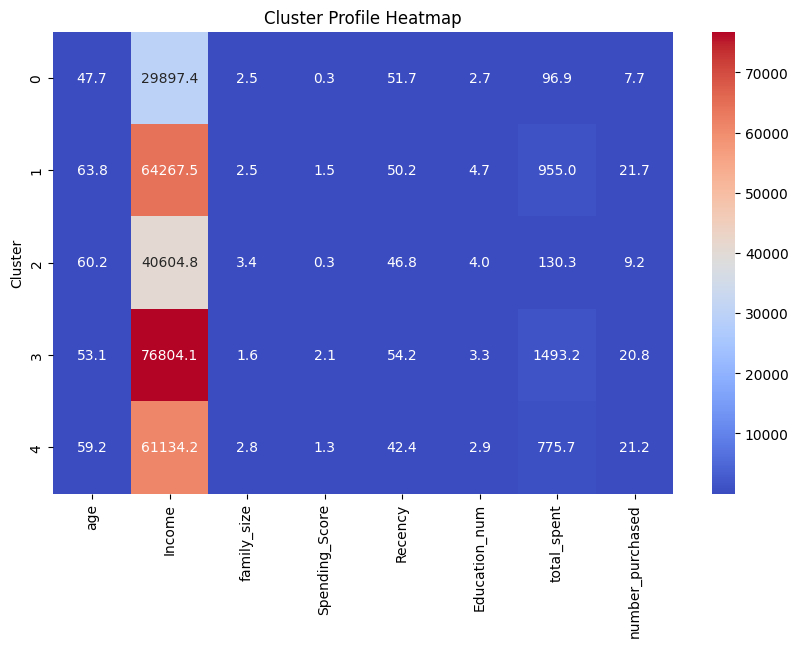

In [245]:
# visulise cluster profile
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Cluster Profile Heatmap")
plt.show()


In [246]:

df[df['Income'].isna()]
# no null values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,age,Marital_Status_num,family_size,Spending_Score,Education_num,total_spent,number_purchased,Cluster


In [247]:
# dupliacted values 
id_unique =df['ID'].duplicated().sum()
print(f"Number of duplicated IDs: {id_unique}")

Number of duplicated IDs: 0


Above are the columns which are existed from the dataaset.

In [248]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
age                      int64
Marital_Status_num       int64
family_size              int64
Spending

In [249]:
df.shape
# there are 2240 rows and 29 columns in the dataset.

(2183, 37)

In [250]:
df.describe

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  age  \
0            0  04-09

checking for NULL values

In [251]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
Marital_Status_num     0
family_size            0
Spending_Score         0
Education_num          0
total_spent            0
number_purchased       0
Cluster                0
dtype: int64

income -- 24  and there are no nulls in other columns


In [252]:
df["Dt_Customer"]
# need to convert into date fromart from object


0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2183, dtype: object

In [253]:
for val in df['Dt_Customer'].head(10):
    print(repr(val))



'04-09-2012'
'08-03-2014'
'21-08-2013'
'10-02-2014'
'19-01-2014'
'09-09-2013'
'13-11-2012'
'08-05-2013'
'06-06-2013'
'13-03-2014'


In [254]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

In [255]:
df['Dt_Customer'].head(10)

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
5   2013-09-09
6   2012-11-13
7   2013-05-08
8   2013-06-06
9   2014-03-13
Name: Dt_Customer, dtype: datetime64[ns]

calculating month , year , day

In [256]:
print(df['Dt_Customer'].head())
print(df['Dt_Customer'].dtype)

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]
datetime64[ns]


In [257]:
df["Dt_Customer_year"] = pd.to_datetime(df["Dt_Customer"]).dt.year
df["Dt_Customer_month"]=pd.to_datetime(df["Dt_Customer"]).dt.month
df["Dt_Customer_day"]=pd.to_datetime(df["Dt_Customer"]).dt.day

In [258]:
# Extract year, month, and day
df['Customer_Year'] = df['Dt_Customer'].dt.year
df['Customer_Month'] = df['Dt_Customer'].dt.month
df['Customer_Day'] = df['Dt_Customer'].dt.day

In [259]:
print(df['Dt_Customer'].dtype)

datetime64[ns]


In [260]:
df.columns
# checking for the new cvolumns which has been created

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'Marital_Status_num', 'family_size', 'Spending_Score',
       'Education_num', 'total_spent', 'number_purchased', 'Cluster',
       'Dt_Customer_year', 'Dt_Customer_month', 'Dt_Customer_day',
       'Customer_Year', 'Customer_Month', 'Customer_Day'],
      dtype='object')

In [261]:
df.duplicated().sum()

np.int64(0)

In [262]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
Marital_Status_num     0
family_size            0
Spending_Score         0
Education_num          0
total_spent            0
number_purchased       0
Cluster                0
Dt_Customer_year       0
Dt_Customer_month      0
Dt_Customer_day        0


In [263]:
df[df.duplicated]
# there are no dupliactes

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_num,total_spent,number_purchased,Cluster,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day


In [264]:
df['Income'].describe()
print(df['Income'].unique())

[58138. 46344. 71613. ... 56981. 69245. 52869.]


In [265]:
df['Income'].isna().sum() 

np.int64(0)

In [266]:
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2183, dtype: float64

In [267]:
df['Income'].fillna(df['Income'].median() , inplace=True)

In [268]:

df['Income'].isna().sum()

np.int64(0)

In [269]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
Marital_Status_num     0
family_size            0
Spending_Score         0
Education_num          0
total_spent            0
number_purchased       0
Cluster                0
Dt_Customer_year       0
Dt_Customer_month      0
Dt_Customer_day        0


In [270]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'Marital_Status_num', 'family_size', 'Spending_Score',
       'Education_num', 'total_spent', 'number_purchased', 'Cluster',
       'Dt_Customer_year', 'Dt_Customer_month', 'Dt_Customer_day',
       'Customer_Year', 'Customer_Month', 'Customer_Day'],
      dtype='object')

Family and Age

In [271]:
# Family & age

In [272]:
df['family_age'] = df['Kidhome'] + df['Teenhome'] # replace 2025 with current year
df['family_age'].describe()
df['age']= 2025 - df['Year_Birth']
df['age'].describe()
df['Year_Birth'].describe()

count    2183.000000
mean     1969.066422
std        11.542560
min      1945.000000
25%      1960.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Total purchases & spend

In [273]:
df['total_purchased']=df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] 
df['total_purchased'].describe()


count    2183.000000
mean       14.845625
std         7.620555
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        43.000000
Name: total_purchased, dtype: float64

In [274]:
# total spend money
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+ df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Spent'].describe()


count    2183.000000
mean      603.679340
std       601.300928
min         5.000000
25%        68.500000
50%       393.000000
75%      1042.500000
max      2525.000000
Name: Total_Spent, dtype: float64

Campaign engagement

In [275]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df['AcceptedCmp1'].describe()
df['AcceptedCmp2'].describe()
df['Total_Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)
df['Total_Campaigns_Accepted']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Total_Campaigns_Accepted, Length: 2183, dtype: int64

In [276]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,2012,9,4,2012,9,4,0,25,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2014,3,8,2014,3,8,2,6,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2013,8,21,2013,8,21,0,21,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2014,2,10,2014,2,10,1,8,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,2014,1,19,2014,1,19,1,19,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,2013,6,13,2013,6,13,1,18,1341,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2014,6,10,2014,6,10,3,22,444,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,2014,1,25,2014,1,25,0,19,1241,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,2014,1,24,2014,1,24,1,23,843,0


In [277]:
top_5_spenders = df.nlargest(5, 'Total_Spent')
top_5_spenders

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
1179,5735,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,...,2014,2,13,2014,2,13,0,18,2525,1
1572,5350,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,...,2014,2,13,2014,2,13,0,18,2525,2
1492,1763,1988,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,...,2013,7,27,2013,7,27,0,29,2524,4
987,4580,1969,Graduation,Married,75759.0,0,0,2013-10-25,46,1394,...,2013,10,25,2013,10,25,0,26,2486,4
1052,4475,1949,PhD,Married,69098.0,0,0,2013-02-16,82,1315,...,2013,2,16,2013,2,16,0,25,2440,0


In [278]:
top_5_spenders = df.nlargest(15, 'Total_Spent')
top_5_spenders

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
1179,5735,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,...,2014,2,13,2014,2,13,0,18,2525,1
1572,5350,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,...,2014,2,13,2014,2,13,0,18,2525,2
1492,1763,1988,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,...,2013,7,27,2013,7,27,0,29,2524,4
987,4580,1969,Graduation,Married,75759.0,0,0,2013-10-25,46,1394,...,2013,10,25,2013,10,25,0,26,2486,4
1052,4475,1949,PhD,Married,69098.0,0,0,2013-02-16,82,1315,...,2013,2,16,2013,2,16,0,25,2440,0
1601,5453,1956,Master,Married,90226.0,0,0,2012-09-26,26,1083,...,2012,9,26,2012,9,26,0,24,2352,1
1458,10133,1970,Graduation,Single,93790.0,0,0,2014-02-12,16,1302,...,2014,2,12,2014,2,12,0,25,2349,4
1288,9010,1972,Master,Married,83151.0,0,0,2013-02-10,80,968,...,2013,2,10,2013,2,10,0,23,2346,4
943,5386,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,...,2013,3,4,2013,3,4,0,18,2302,4
1301,6024,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,...,2013,3,4,2013,3,4,0,18,2302,4


In [279]:
top_5_spenders = df.nlargest(15, 'total_purchased')
top_5_spenders

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,2013,1,6,2013,1,6,1,43,1730,0
432,238,1967,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,...,2013,1,23,2013,1,23,2,39,1082,0
412,7030,1955,PhD,Married,66465.0,0,1,2013-03-30,1,1200,...,2013,3,30,2013,3,30,1,35,1485,1
627,4299,1960,Graduation,Together,70971.0,0,1,2012-09-21,28,1001,...,2012,9,21,2012,9,21,1,34,1825,1
1252,5153,1967,PhD,Married,77766.0,0,1,2013-02-22,97,1004,...,2013,2,22,2013,2,22,1,34,1529,2
1669,4127,1967,PhD,Married,77766.0,0,1,2013-02-22,97,1004,...,2013,2,22,2013,2,22,1,34,1529,2
1674,3389,1970,Graduation,Married,69016.0,0,1,2012-11-22,61,726,...,2012,11,22,2012,11,22,1,34,1533,0
287,8148,1956,Master,Together,50898.0,1,1,2013-01-08,88,285,...,2013,1,8,2013,1,8,2,33,859,0
470,2021,1975,Graduation,Married,61456.0,0,1,2013-03-27,47,563,...,2013,3,27,2013,3,27,1,33,1388,0
1067,2223,1965,2n Cycle,Divorced,64176.0,0,1,2012-08-03,52,1215,...,2012,8,3,2012,8,3,1,33,1826,0


In [280]:
# df['NumWebPurchases'] # 5376
df[df['ID'] == 5376]



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,2013,1,6,2013,1,6,1,43,1730,0


In [281]:
top_spenders = df.sort_values('Total_Spent', ascending=False)
top_spenders
df['ID'].value_counts() # unique IDs only once each
total_purchased = df.sort_values('total_purchased', ascending=False)
total_purchased


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,2013,1,6,2013,1,6,1,43,1730,0
432,238,1967,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,...,2013,1,23,2013,1,23,2,39,1082,0
412,7030,1955,PhD,Married,66465.0,0,1,2013-03-30,1,1200,...,2013,3,30,2013,3,30,1,35,1485,1
627,4299,1960,Graduation,Together,70971.0,0,1,2012-09-21,28,1001,...,2012,9,21,2012,9,21,1,34,1825,1
1252,5153,1967,PhD,Married,77766.0,0,1,2013-02-22,97,1004,...,2013,2,22,2013,2,22,1,34,1529,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,2014,3,13,2014,3,13,2,2,49,1
774,4303,1957,PhD,Together,6835.0,0,1,2012-12-08,76,107,...,2012,12,8,2012,12,8,1,1,137,0
2214,9303,1976,Graduation,Married,5305.0,0,1,2013-07-30,12,12,...,2013,7,30,2013,7,30,1,1,32,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,...,2014,6,22,2014,6,22,0,0,6,0


In [282]:
total_purchased = df.sort_values('total_purchased', ascending=False)
total_purchased

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,2013,1,6,2013,1,6,1,43,1730,0
432,238,1967,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,...,2013,1,23,2013,1,23,2,39,1082,0
412,7030,1955,PhD,Married,66465.0,0,1,2013-03-30,1,1200,...,2013,3,30,2013,3,30,1,35,1485,1
627,4299,1960,Graduation,Together,70971.0,0,1,2012-09-21,28,1001,...,2012,9,21,2012,9,21,1,34,1825,1
1252,5153,1967,PhD,Married,77766.0,0,1,2013-02-22,97,1004,...,2013,2,22,2013,2,22,1,34,1529,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,2014,3,13,2014,3,13,2,2,49,1
774,4303,1957,PhD,Together,6835.0,0,1,2012-12-08,76,107,...,2012,12,8,2012,12,8,1,1,137,0
2214,9303,1976,Graduation,Married,5305.0,0,1,2013-07-30,12,12,...,2013,7,30,2013,7,30,1,1,32,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,...,2014,6,22,2014,6,22,0,0,6,0


In [283]:
total_purchased = df.sort_values('age', ascending=False)
total_purchased

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
1742,263,1945,PhD,Single,45576.0,0,0,2014-05-28,9,56,...,2014,5,28,2014,5,28,0,8,145,1
790,6543,1945,Master,Together,62847.0,0,0,2013-01-15,45,521,...,2013,1,15,2013,1,15,0,14,1612,0
103,9370,1945,PhD,Married,65846.0,0,0,2013-05-17,68,562,...,2013,5,17,2013,5,17,0,16,1120,0
1329,158,1945,PhD,Together,71604.0,0,0,2013-11-17,3,345,...,2013,11,17,2013,11,17,0,17,1196,2
1637,10711,1945,Graduation,Married,69755.0,0,0,2013-10-02,23,217,...,2013,10,2,2013,10,2,0,22,894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,8315,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2014,3,26,2014,3,26,0,4,23,0
995,5184,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2014,3,26,2014,3,26,0,4,23,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,2012,10,12,2012,10,12,0,19,1435,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,2012,11,9,2012,11,9,0,10,122,1


In [284]:
# remove the age more than 100 years 
df = df[df['age'] <= 100]

In [285]:
age = df.sort_values('age', ascending=False)
age

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted
1742,263,1945,PhD,Single,45576.0,0,0,2014-05-28,9,56,...,2014,5,28,2014,5,28,0,8,145,1
790,6543,1945,Master,Together,62847.0,0,0,2013-01-15,45,521,...,2013,1,15,2013,1,15,0,14,1612,0
103,9370,1945,PhD,Married,65846.0,0,0,2013-05-17,68,562,...,2013,5,17,2013,5,17,0,16,1120,0
1329,158,1945,PhD,Together,71604.0,0,0,2013-11-17,3,345,...,2013,11,17,2013,11,17,0,17,1196,2
1637,10711,1945,Graduation,Married,69755.0,0,0,2013-10-02,23,217,...,2013,10,2,2013,10,2,0,22,894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,8315,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2014,3,26,2014,3,26,0,4,23,0
995,5184,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2014,3,26,2014,3,26,0,4,23,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,2012,10,12,2012,10,12,0,19,1435,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,2012,11,9,2012,11,9,0,10,122,1


In [286]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'Marital_Status_num', 'family_size', 'Spending_Score',
       'Education_num', 'total_spent', 'number_purchased', 'Cluster',
       'Dt_Customer_year', 'Dt_Customer_month', 'Dt_Customer_day',
       'Customer_Year', 'Customer_Month', 'Customer_Day', 'family_age',
       'total_purchased', 'Total_Spent', 'Total_Campaigns_Accepted'],
      dtype='object')

# # RFM Segmentation

In [287]:
df[['Recency', 'Dt_Customer']]


,Recency,Dt_Customer
0,58,2012-09-04
1,38,2014-03-08
2,26,2013-08-21
3,26,2014-02-10
4,94,2014-01-19
...,...,...
2235,46,2013-06-13
2236,56,2014-06-10
2237,91,2014-01-25
2238,8,2014-01-24


In [288]:
rfm = pd.DataFrame()

rfm['Recency'] = pd.qcut(df['Recency'], 5, labels=[5,4,3,2,1])
rfm['Frequency'] = pd.qcut(df['total_purchased'].rank(method='first'), 5, labels=[5,4,3,2,1])
rfm['Monetary']  = pd.qcut(df['Total_Spent'].rank(method='first'), 5, labels=[5,4,3,2,1])
rfm['rfm_total'] = rfm['Recency'].astype(int) + rfm['Frequency'].astype(int) + rfm['Monetary'].astype(int)



In [289]:
rfm.head()

,Recency,Frequency,Monetary,rfm_total
0,3,1,1,5
1,4,5,5,14
2,4,2,2,8
3,4,4,5,13
4,1,2,3,6


In [290]:
def rfm_segment(rfm_total):
    if rfm_total >= 13: 
        return 'Champions'
    elif rfm_total >= 11: 
        return 'Loyal Customers'
    elif rfm_total >= 9: 
        return 'Potential Loyalists'
    elif rfm_total >= 7: 
        return 'At Risk'
    elif rfm_total >= 5: 
        return 'Need Attention'
    else: 
        return 'Lost'

# -------------------------------
# 5️⃣ Apply segmentation to df
rfm['Segment'] = rfm['rfm_total'].apply(rfm_segment)



In [291]:
rfm

,Recency,Frequency,Monetary,rfm_total,Segment
0,3,1,1,5,Need Attention
1,4,5,5,14,Champions
2,4,2,2,8,At Risk
3,4,4,5,13,Champions
4,1,2,3,6,Need Attention
...,...,...,...,...,...
2235,3,2,1,6,Need Attention
2236,3,1,3,7,At Risk
2237,1,2,1,4,Lost
2238,5,1,2,8,At Risk


In [292]:
df.loc[:, 'RFM_Segment'] = rfm['Segment']

In [293]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted,RFM_Segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,9,4,2012,9,4,0,25,1617,1,Need Attention
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,8,2014,3,8,2,6,27,0,Champions
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,21,2013,8,21,0,21,776,0,At Risk
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,10,2014,2,10,1,8,53,0,Champions
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,1,19,2014,1,19,1,19,422,0,Need Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,6,13,2013,6,13,1,18,1341,0,Need Attention
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,6,10,2014,6,10,3,22,444,1,At Risk
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,25,2014,1,25,0,19,1241,1,Lost
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,1,24,2014,1,24,1,23,843,0,At Risk


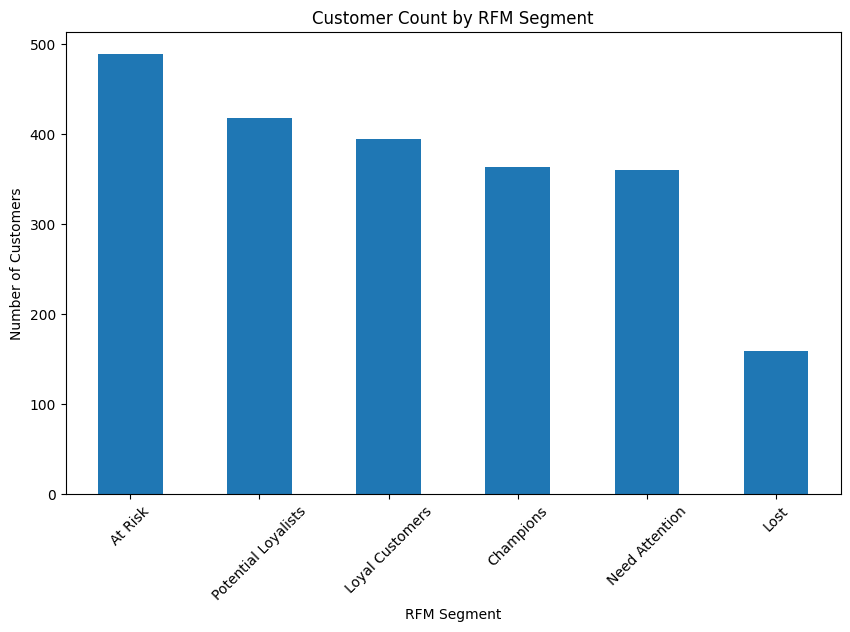

In [294]:
# Shows how many customers belong to each group.
plt.figure(figsize=(10,6))
df['RFM_Segment'].value_counts().plot(kind='bar')
plt.title('Customer Count by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


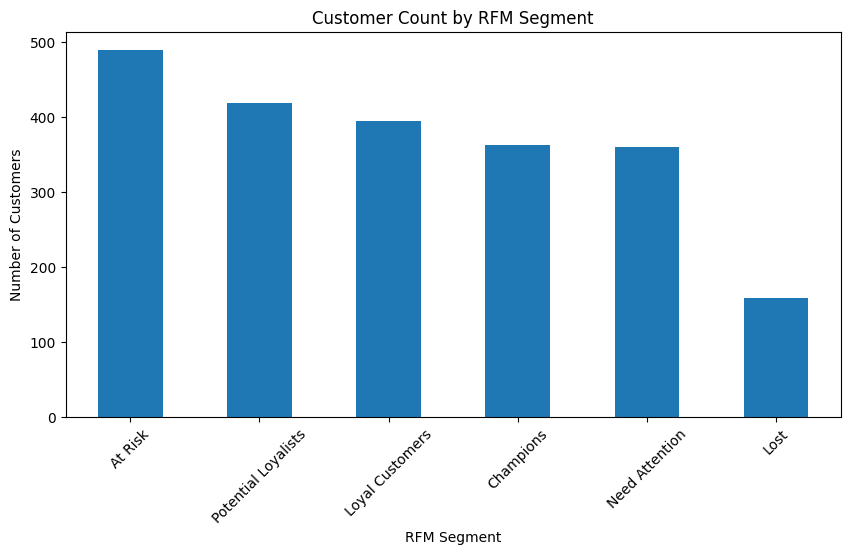

In [295]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['RFM_Segment'].value_counts().plot(kind='bar')
plt.title('Customer Count by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

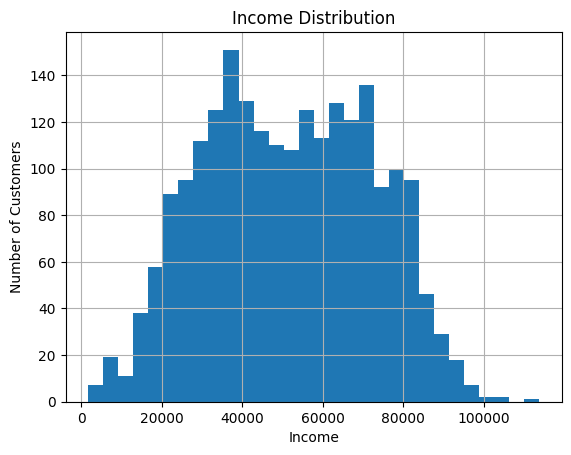

In [296]:
df['Income'].hist(bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

In [297]:
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2183, dtype: float64

In [298]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

In [299]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [300]:
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outliers.shape
outliers


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted,RFM_Segment


In [301]:
df[df['Income']==666666.0]
df['ID'].count() # np.int64(2237)
df[df['Income']==666666.0]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Dt_Customer_month,Dt_Customer_day,Customer_Year,Customer_Month,Customer_Day,family_age,total_purchased,Total_Spent,Total_Campaigns_Accepted,RFM_Segment


In [302]:
df = df[df['Income'] != 666666.0]

In [303]:
import seaborn as sns



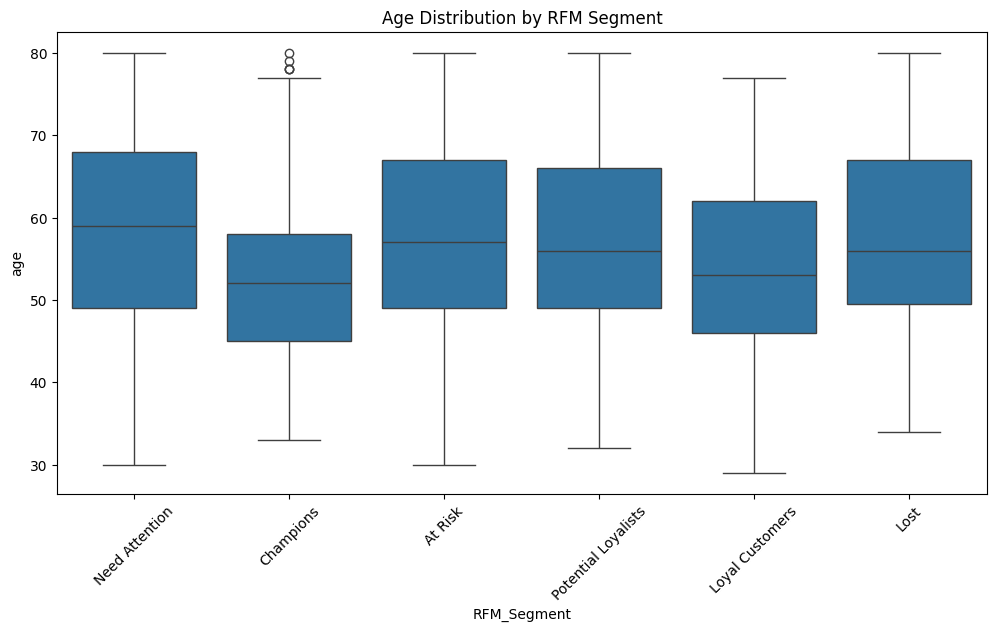

In [304]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='RFM_Segment', y='age')
plt.title('Age Distribution by RFM Segment')
plt.xticks(rotation=45)
plt.show()

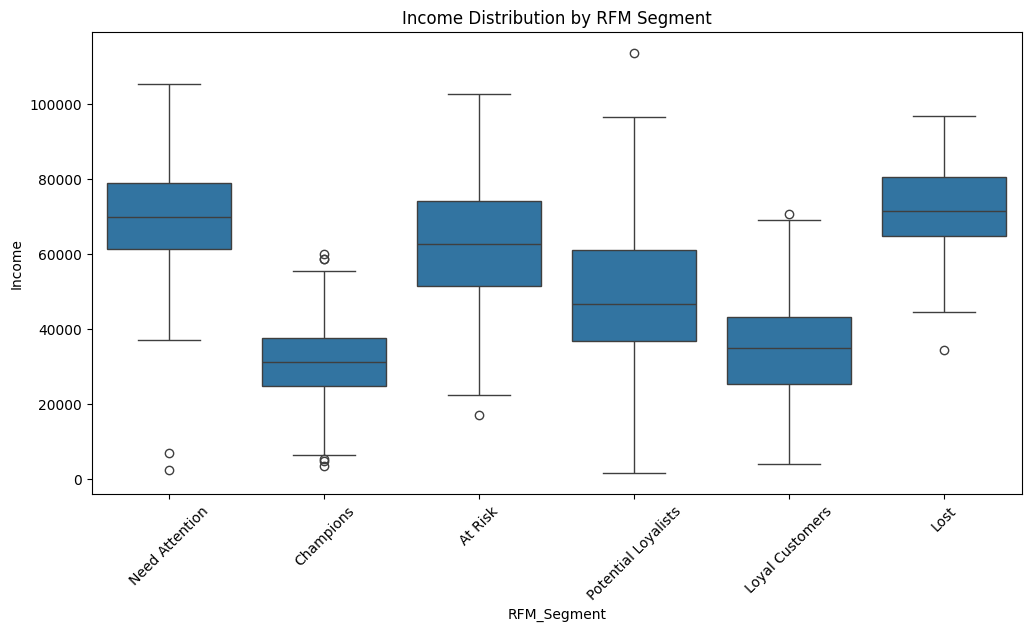

In [305]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='RFM_Segment', y='Income')
plt.title('Income Distribution by RFM Segment')
plt.xticks(rotation=45)
plt.show()


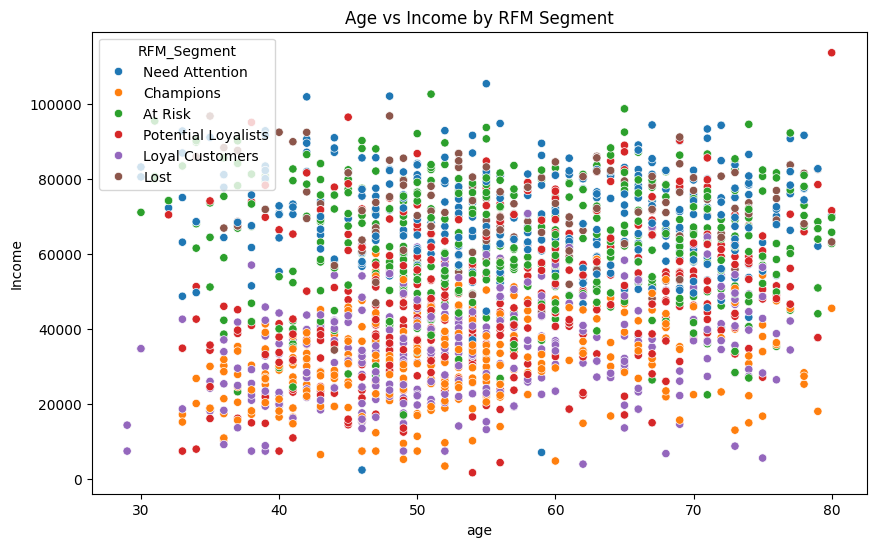

In [306]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='Income', hue='RFM_Segment')
plt.title('Age vs Income by RFM Segment')
plt.show()


In [307]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'Marital_Status_num', 'family_size', 'Spending_Score',
       'Education_num', 'total_spent', 'number_purchased', 'Cluster',
       'Dt_Customer_year', 'Dt_Customer_month', 'Dt_Customer_day',
       'Customer_Year', 'Customer_Month', 'Customer_Day', 'family_age',
       'total_purchased', 'Total_Spent', 'Total_Campaigns_Accepted',
       'RFM_Segment'],
      dtype='object')